In [1]:
import numpy as np
import json
from matplotlib.pyplot import imshow
import IPython.display
from PIL import Image

In [2]:
# ML Testing Steps 
# Original Python Notebook with latest model and test images
# Rune execution within a notebook
# Runefile review etc 
# git lfs for the data 
# Runefile + TF Lite + Data/


In [3]:
!cat Runefile.yml

image: runicos/base
version: 1

pipeline:
  content_image:
    capability: IMAGE
    outputs:
    - type: u8
      dimensions: [1, 384, 384, 3]
    args:
      source: 0
      pixel-format: "@PixelFormat::RGB"
      width: 384
      height: 384

  style:
    capability: IMAGE
    outputs:
    - type: u8
      dimensions: [1, 256, 256, 3]
    args:
      source: 1
      pixel-format: "@PixelFormat::RGB"
      width: 256
      height: 256

  normalized_content_image:
    proc-block: "hotg-ai/rune#proc-blocks/image-normalization"
    inputs:
    - content_image
    outputs:
    - type: f32
      dimensions: [1, 384, 384, 3]

  normalized_style_image:
    proc-block: "hotg-ai/rune#proc-blocks/image-normalization"
    inputs:
    - style
    outputs:
    - type: f32
      dimensions: [1, 256, 256, 3]

  style_vector:
    model: ./style_predict.tflite
    inputs:
    - normalized_style_image
    outputs:
    - type: f32
      dimensions: [1, 1, 1, 100]

  style_transform:
    model: ./style_

    Blocking waiting for file lock on build directory
   Compiling rune-cli v0.4.0-dev (/home/michael/Documents/hotg-ai/rune/crates/rune-cli)
    Finished dev [unoptimized + debuginfo] target(s) in 26.07s             
     Running `/home/michael/Documents/hotg-ai/rune/target/debug/rune graph Runefile.yml`
[2021-07-25T20:37:41.086Z DEBUG rune_cli::build] Parsing "Runefile.yml"


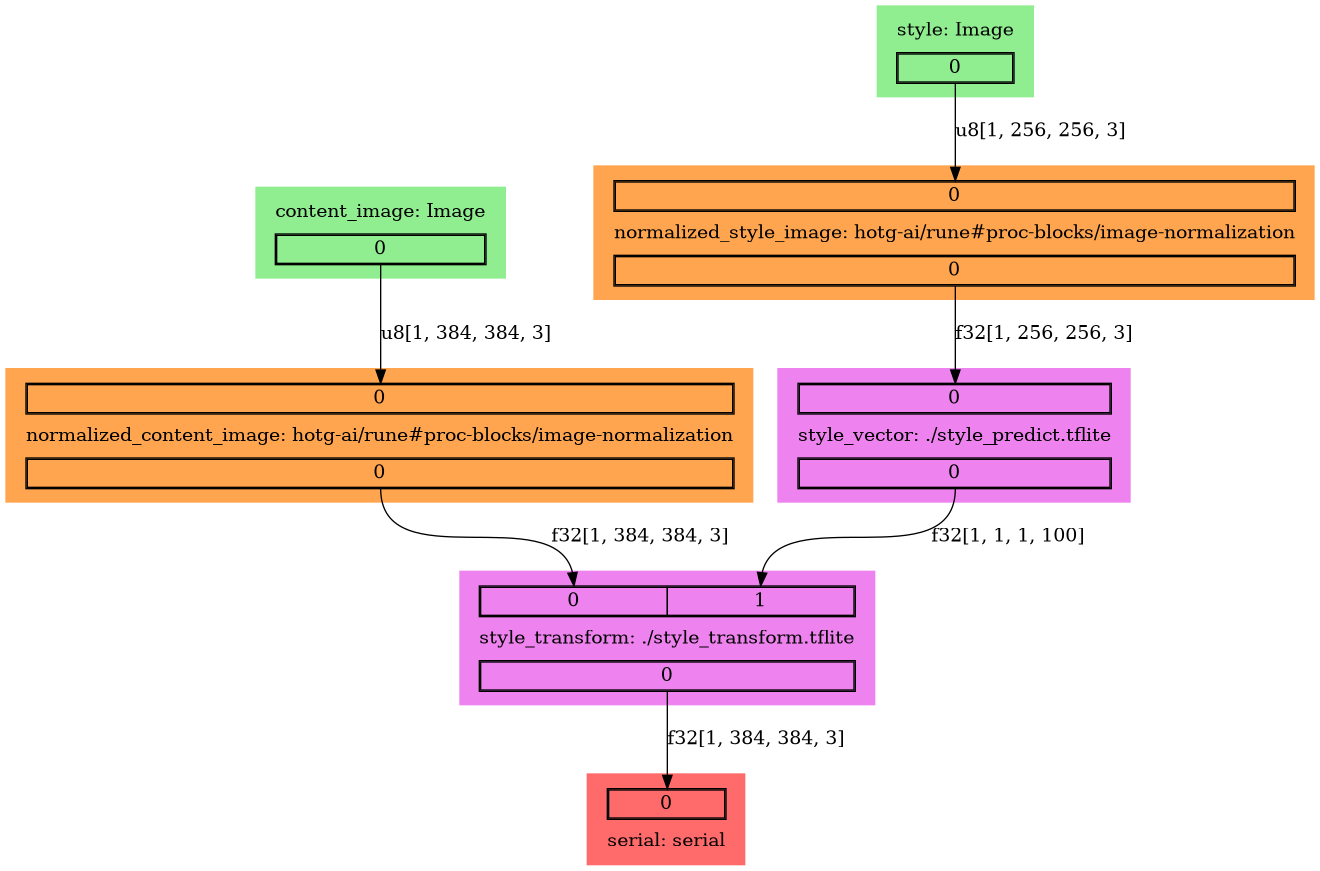

In [4]:
!cargo rune graph Runefile.yml | dot -Tpng > style_transfer.png

IPython.display.Image('style_transfer.png')

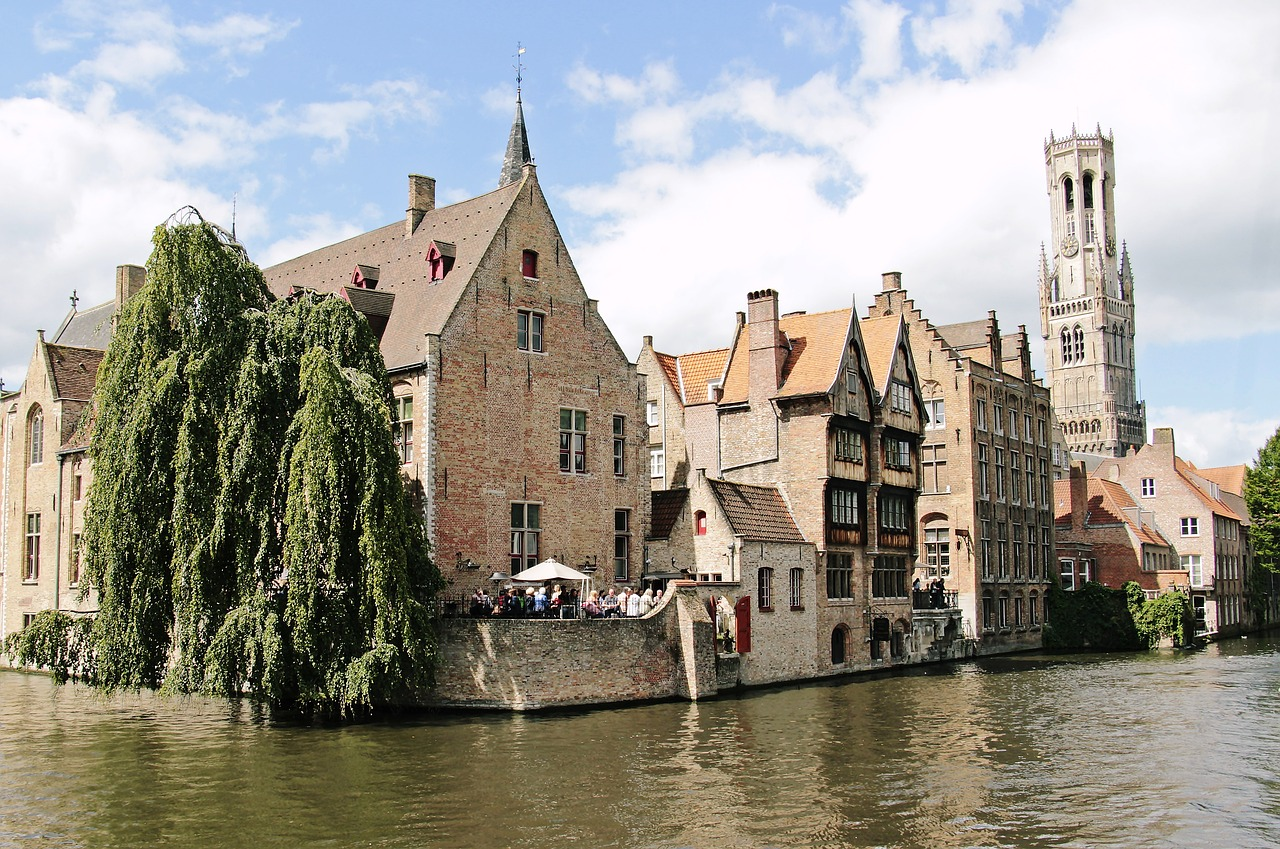

In [5]:
IPython.display.Image('content.jpg')

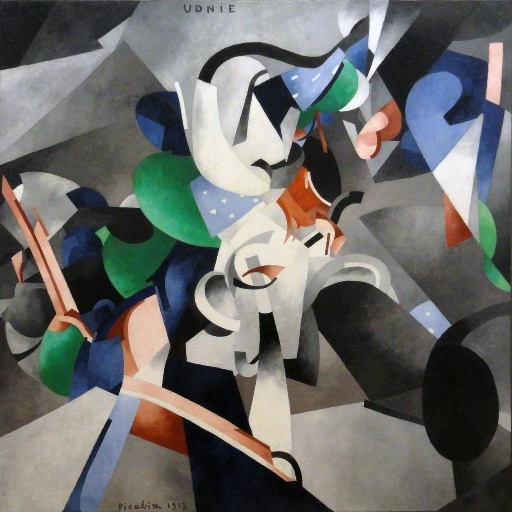

In [6]:
IPython.display.Image('style.jpg')

In [7]:
!cargo r --package rune-cli --release -- build Runefile.yml

    Finished release [optimized] target(s) in 0.46s
     Running `/home/michael/Documents/hotg-ai/rune/target/release/rune build Runefile.yml`
[2021-07-25T20:37:42.246Z DEBUG rune_cli::build] Parsing "Runefile.yml"
[2021-07-25T20:37:42.253Z DEBUG rune_cli::build] Compiling style_transfer in "/home/michael/.cache/runes/style_transfer"
[2021-07-25T20:37:42.257Z DEBUG rune_codegen::environment] Read 2828838 bytes from "/home/michael/Documents/hotg-ai/rune/examples/style_transfer/./style_predict.tflite"
[2021-07-25T20:37:42.257Z DEBUG rune_codegen::environment] Read 284398 bytes from "/home/michael/Documents/hotg-ai/rune/examples/style_transfer/./style_transform.tflite"
[2021-07-25T20:37:42.259Z INFO  rune_codegen::environment] Generating the project in "/home/michael/.cache/runes/style_transfer"
[2021-07-25T20:37:42.260Z DEBUG rune_codegen::environment] Wrote 1248 bytes to "/home/michael/.cache/runes/style_transfer/Cargo.toml"
[2021-07-25T20:37:42.261Z DEBUG rune_codegen::environment] Wro

In [26]:
RES = !cargo r --package rune-cli --release -- run ./style_transfer.rune --image /home/michael/Pictures/hotg.png --image style.jpg

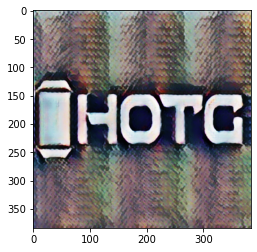

In [27]:
log_message = next(line for line in RES if 'Serial: ' in line)
*_, raw = log_message.split('Serial: ')
output = json.loads(raw)

arr = np.asarray(output['elements']) * 255
arr = arr.astype('uint8')
arr = np.reshape(arr, (384, 384, 3))
img = Image.fromarray(arr, 'RGB')

imshow(img);